In [277]:
# created Jun 30, 2022 by G Oldford
# purpose: calculate mean values of attenuated irradiance across 1979 to present
# data in: ASC with w m-2
# data out: mean vals by month and grouped in different ways (e.g., as a monthly climatology from 1979 to present)

library(raster)
library(tidyverse)

path1 = "C:\\Users\\Greig\\Sync\\PSF\\EwE\\Georgia Strait 2021\\LTL_model\\DATA\\SalishSea1500-RUN202\\ECOSPACE_in_RUN103a\\LightAttenuation_PAR-VarZ-VarK\\"


In [253]:
# loop through all ASC files to calculate mean light by month, across all years
# - light is 'experienced' phyto light across mixing lyr
# - note #plot(r) can be used to visualize any ASC

months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path1,"*",mo,".asc",sep="")) # get all ASC for month
outlist2 <- list() #create empty list to store mean vals for this month, across all years
    
for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    val <- getValues(r) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
outlist1[[i]] <- c(mo,mo_name,m2) #store raster path with month, mean
}

df <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df) <- c("month","mo_name","mean")
df$meanval <- as.numeric(as.character(df$mean))
df$mo_name <- factor(df$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov", "Dec"))
return("complete")

#rasterlist <- list("path 1","path 2",...) #create list of raster file paths


[1] "complete"

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (1): y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.def

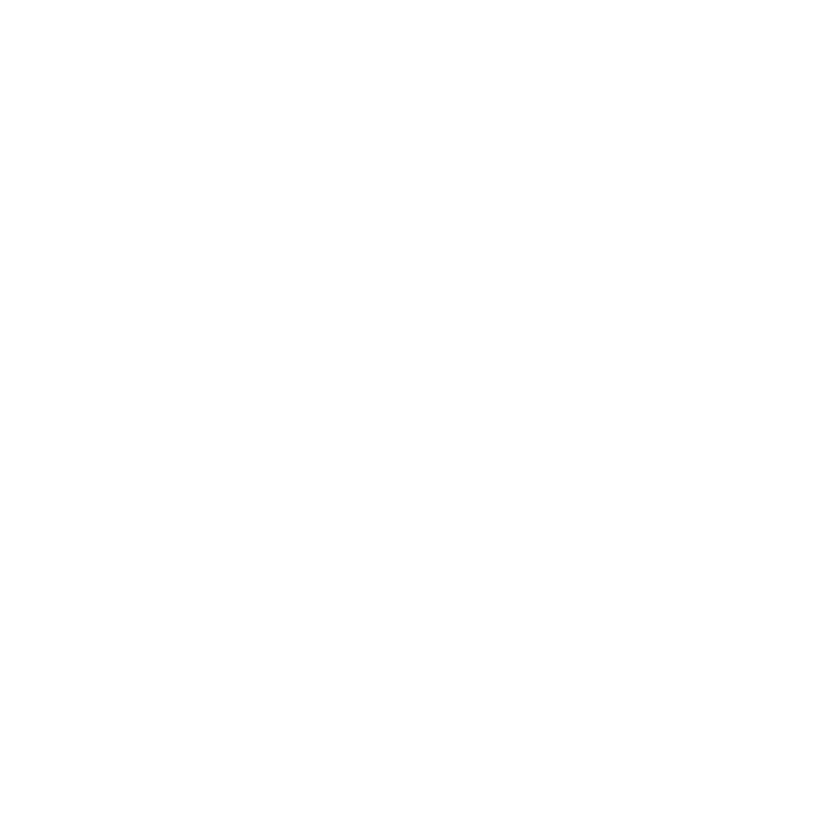

In [251]:
# ridglelines might be nice style, but are really only meant for histogram visuals

# to do: add line where optimal growth
df %>%
  #ggplot( aes(x=month, y=mean, group=name, color=name))
  ggplot( aes(x=mo_name, y=meanval, group=1)) +
    geom_point() + geom_line()

In [185]:
# loop through all ASC files to calculate mean light by month, by year

yrs = 1979:2018
months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (h in 1:length(yrs)) {

yr = yrs[[h]]
print(yr)
 
for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path1,"*",yr,"_", mo,".asc",sep="")) # get all ASC for yr month
outlist2 <- list() #create empty list to store mean vals for this month, across all years

if (length(filenames>0)){
    

for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    val <- getValues(r) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
e1 = (h-1)*12+i
outlist1[[e1]] <- c(yr,mo,mo_name,m2) #store yr, month, mean
}
}
}
    
df2 <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df2) <- c("year","month","mo_name","mean")
df2$ts = as.numeric(paste(as.character(df2$year), as.character(df2$month), sep=""))
df2$mo_name <- factor(df2$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"))
df2$meanval = as.numeric(as.character(df2$mean))
df2$yearval <- as.numeric(as.character(df2$year))

return("complete")


[1] 1979
[1] 1980
[1] 1981
[1] 1982
[1] 1983
[1] 1984
[1] 1985
[1] 1986
[1] 1987
[1] 1988
[1] 1989
[1] 1990
[1] 1991
[1] 1992
[1] 1993
[1] 1994
[1] 1995
[1] 1996
[1] 1997
[1] 1998
[1] 1999
[1] 2000
[1] 2001
[1] 2002
[1] 2003
[1] 2004
[1] 2005
[1] 2006
[1] 2007
[1] 2008
[1] 2009
[1] 2010
[1] 2011
[1] 2012
[1] 2013
[1] 2014
[1] 2015
[1] 2016
[1] 2017
[1] 2018


ERROR: Error in `$<-.data.frame`(`*tmp*`, ts, value = numeric(0)): replacement has 0 rows, data has 479


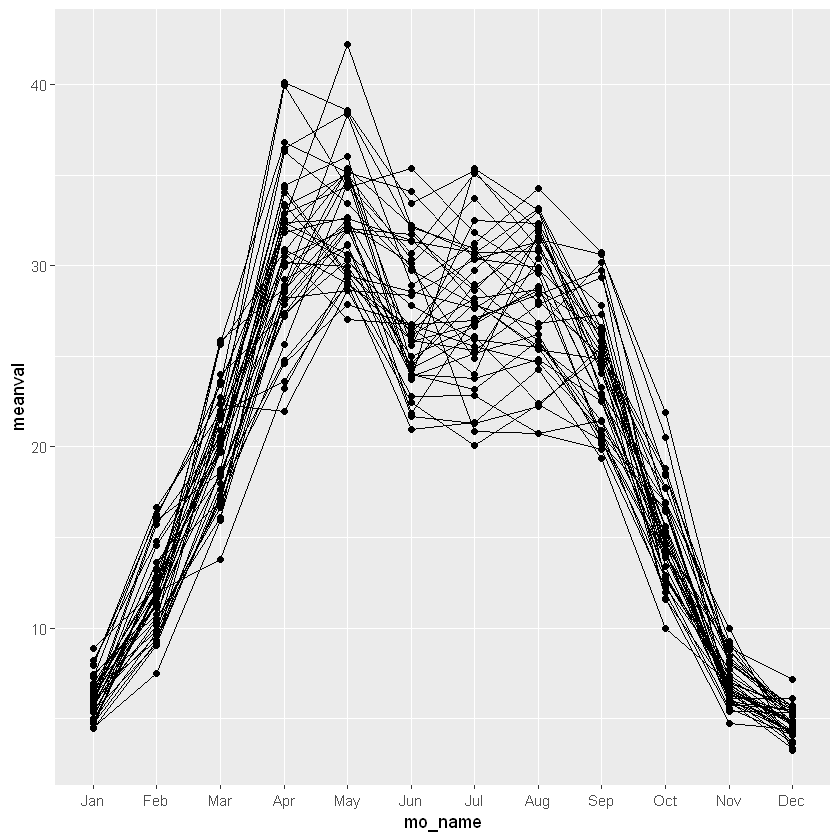

In [250]:
df2 %>%
  #ggplot( aes(x=month, y=mean, group=name, color=name))
  ggplot( aes(x=mo_name, y=meanval, group=year)) +
    geom_point() + geom_line()

## 

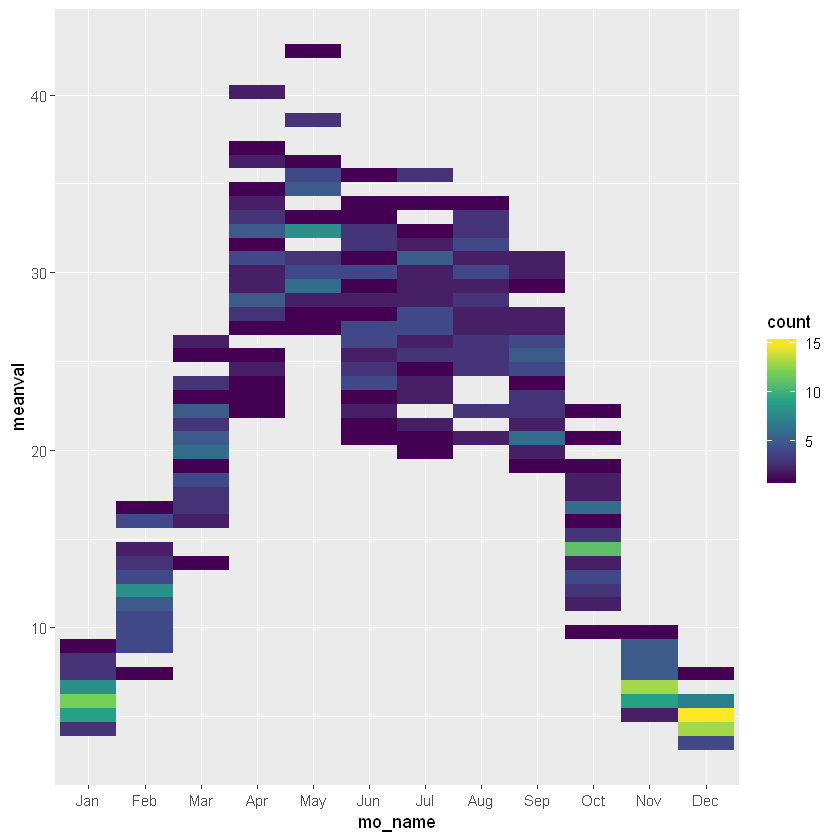

In [209]:
df2 %>% ggplot( aes(x=mo_name, y=meanval)) + geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis")

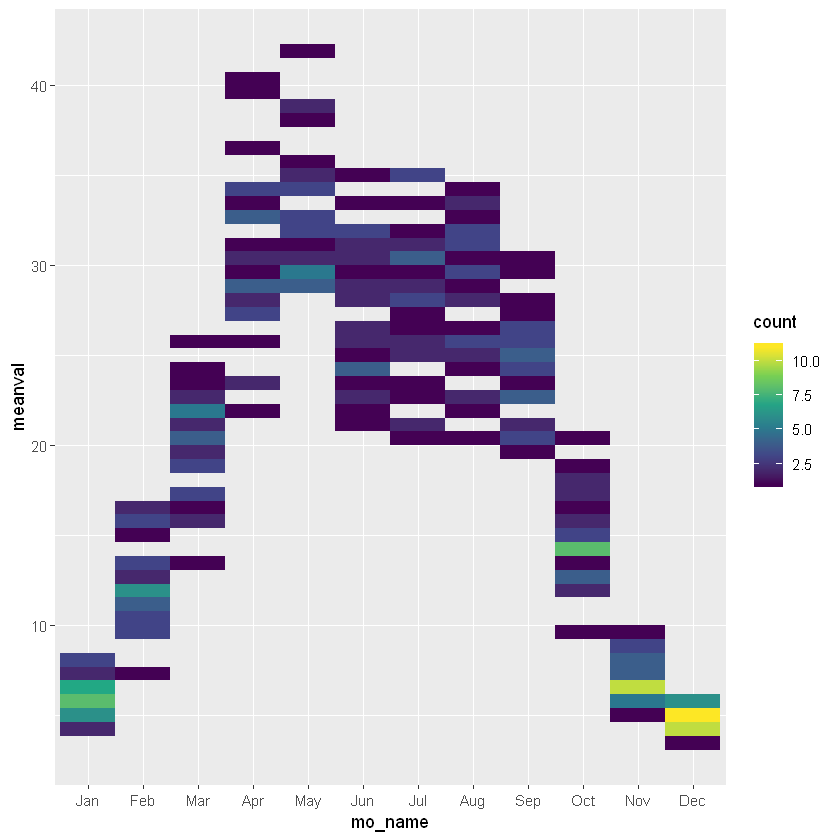

In [214]:
df2 %>% filter(yearval>1990) %>% ggplot( aes(x=mo_name, y=meanval)) + geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis")

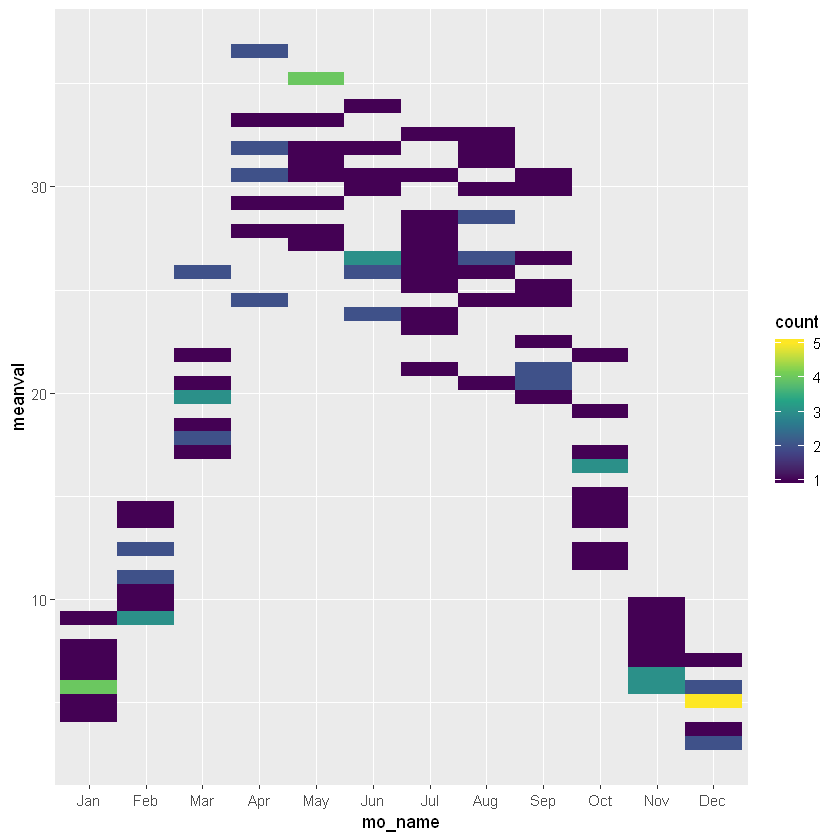

In [215]:
df2 %>% filter(yearval<1990) %>% ggplot( aes(x=mo_name, y=meanval)) + geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis")

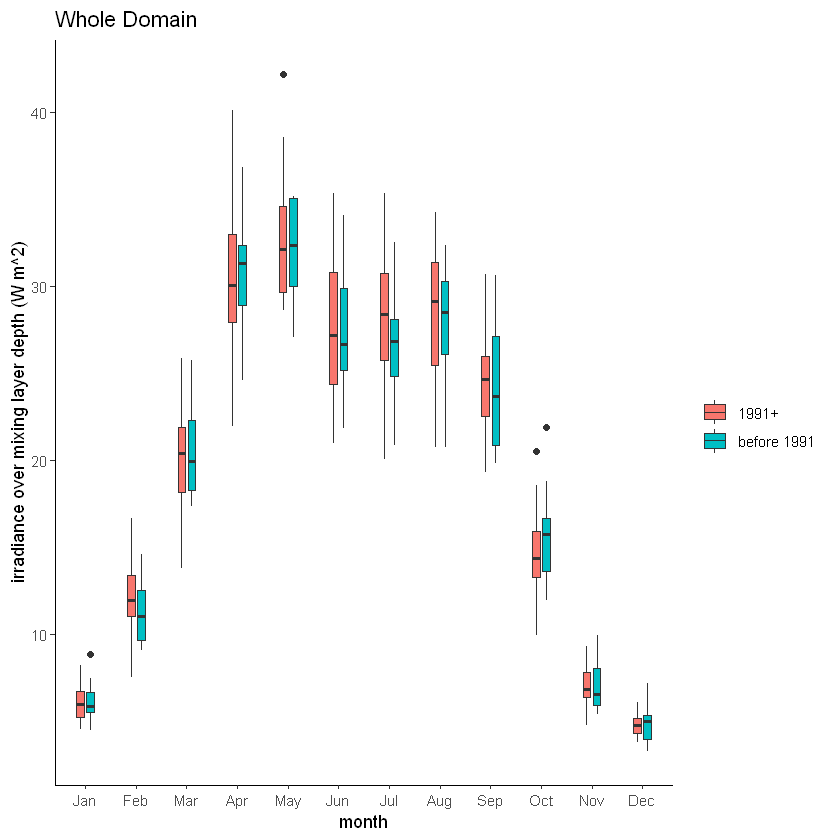

In [282]:
df2$regimeyr <- "1991+"               # Assign categories based on numeric range
df2$regimeyr[df2$yearval <= 1990] <- "before 1991"

# Basic violin plot
p <- df2 %>% ggplot(aes(x=mo_name, y=meanval, fill=regimeyr)) + 
  #geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="Whole Domain",x="month", y = "irradiance over mixing layer depth (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p


In [260]:
# regionalized
NSoG <- crop(r, extent(r, 30, 50, 1, 100))

Warning message in .local(x, ...):
"invalid second colummn"

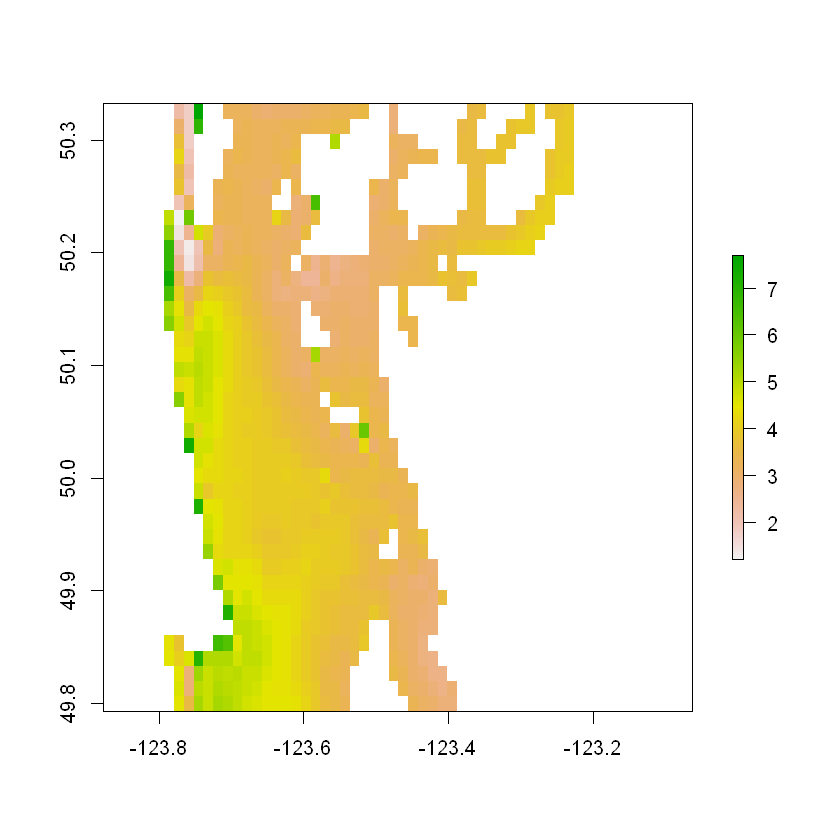

In [269]:
extent_NSoG <- extent(r,1,40,1,50)
r_NSoG <- crop(r, extent_NSoG)
plot(NSoG)

In [264]:
# code as above with regionalization
extent_NSoG <- extent(r,1,40,1,50)


# loop through all ASC files to calculate mean light by month, by year

yrs = 1979:2018
months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (h in 1:length(yrs)) {

yr = yrs[[h]]
print(yr)
 
for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path1,"*",yr,"_", mo,".asc",sep="")) # get all ASC for yr month
outlist2 <- list() #create empty list to store mean vals for this month, across all years

if (length(filenames>0)){
    

for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    r_NSoG <- crop(r, extent_NSoG)
    val <- getValues(r_NSoG) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
e1 = (h-1)*12+i
outlist1[[e1]] <- c(yr,mo,mo_name,m2) #store yr, month, mean
}
}
}
    
df3_NSoG <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df3_NSoG) <- c("year","month","mo_name","mean")
df3_NSoG$ts = as.numeric(paste(as.character(df3_NSoG$year), as.character(df3_NSoG$month), sep=""))
df3_NSoG$mo_name <- factor(df3_NSoG$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"))
df3_NSoG$meanval = as.numeric(as.character(df3_NSoG$mean))
df3_NSoG$yearval <- as.numeric(as.character(df3_NSoG$year))

return("complete")


[1] 1979
[1] 1980
[1] 1981
[1] 1982
[1] 1983
[1] 1984
[1] 1985
[1] 1986
[1] 1987
[1] 1988
[1] 1989
[1] 1990
[1] 1991
[1] 1992
[1] 1993
[1] 1994
[1] 1995
[1] 1996
[1] 1997
[1] 1998
[1] 1999
[1] 2000
[1] 2001
[1] 2002
[1] 2003
[1] 2004
[1] 2005
[1] 2006
[1] 2007
[1] 2008
[1] 2009
[1] 2010
[1] 2011
[1] 2012
[1] 2013
[1] 2014
[1] 2015
[1] 2016
[1] 2017
[1] 2018


[1] "complete"

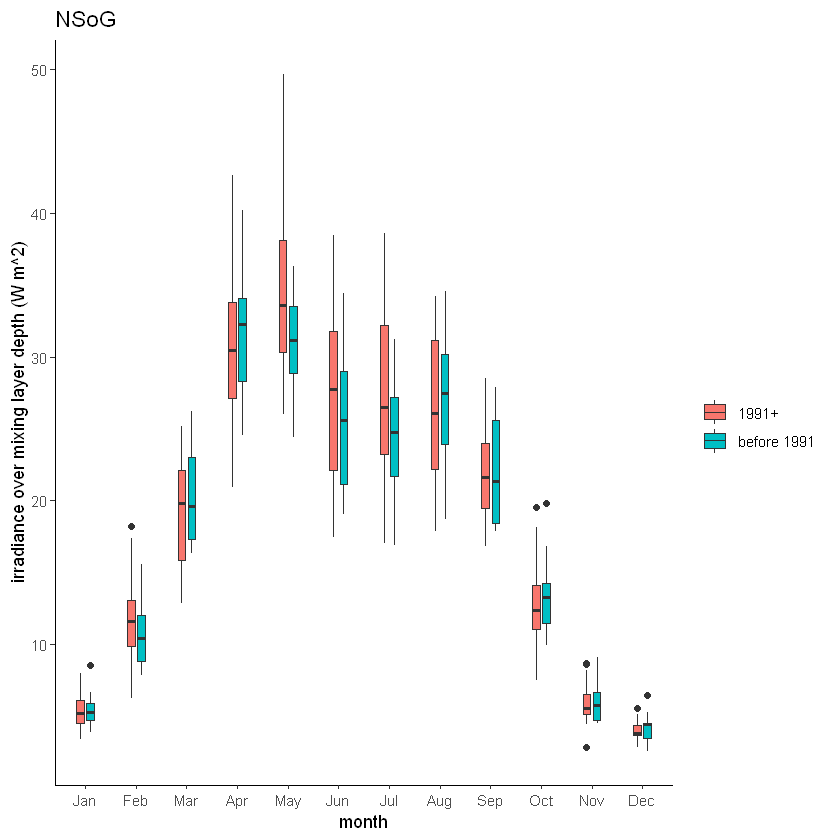

In [268]:
df3_NSoG$regimeyr <- "1991+"               # Assign categories based on numeric range
df3_NSoG$regimeyr[df3_NSoG$yearval <= 1990] <- "before 1991"

# Basic violin plot
p <- df3_NSoG %>% ggplot(aes(x=mo_name, y=meanval, fill=regimeyr)) + 
  #geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="NSoG",x="month", y = "irradiance over mixing layer depth (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p


Warning message in .local(x, ...):
"invalid second colummn"

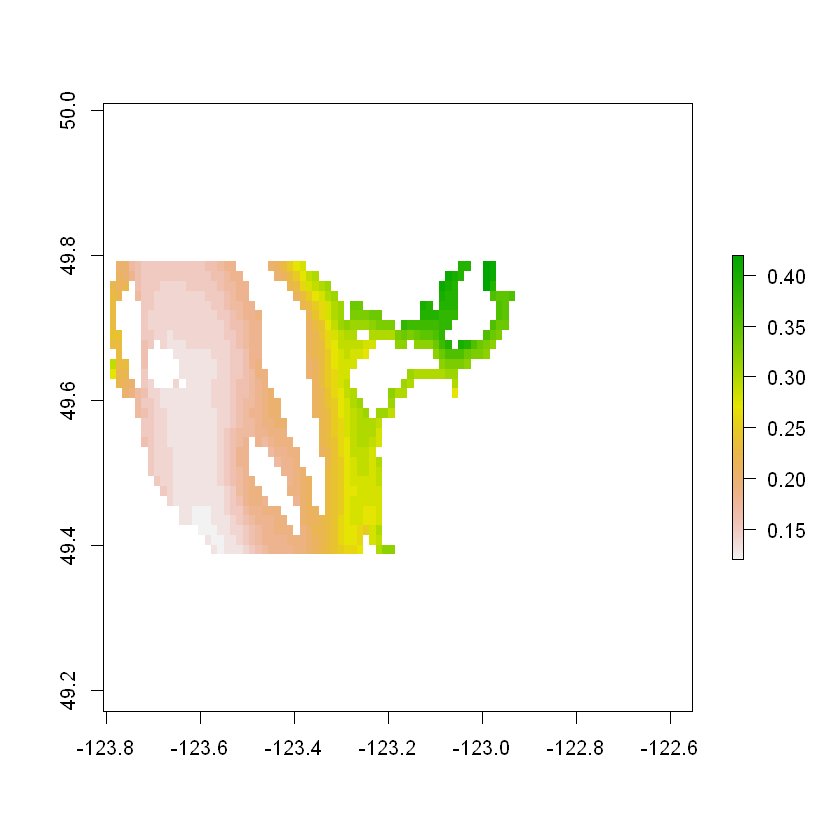

In [275]:
extent_CSoG <- extent(r,41,70,1,100)
r_CSoG <- crop(r, extent_CSoG)
plot(r_CSoG)

In [278]:
# code as above with regionalization
extent_CSoG <- extent(r,41,70,1,100)

# loop through all ASC files to calculate mean light by month, by year

yrs = 1979:2018
months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (h in 1:length(yrs)) {

yr = yrs[[h]]
print(yr)
 
for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path1,"*",yr,"_", mo,".asc",sep="")) # get all ASC for yr month
outlist2 <- list() #create empty list to store mean vals for this month, across all years

if (length(filenames>0)){
    

for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    r_CSoG <- crop(r, extent_CSoG)
    val <- getValues(r_CSoG) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
e1 = (h-1)*12+i
outlist1[[e1]] <- c(yr,mo,mo_name,m2) #store yr, month, mean
}
}
}
    
df4_CSoG <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df4_CSoG) <- c("year","month","mo_name","mean")
df4_CSoG$ts = as.numeric(paste(as.character(df4_CSoG$year), as.character(df4_CSoG$month), sep=""))
df4_CSoG$mo_name <- factor(df4_CSoG$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"))
df4_CSoG$meanval = as.numeric(as.character(df4_CSoG$mean))
df4_CSoG$yearval <- as.numeric(as.character(df4_CSoG$year))

return("complete")

Warning message in .local(x, ...):
"invalid second colummn"

[1] 1979
[1] 1980
[1] 1981
[1] 1982
[1] 1983
[1] 1984
[1] 1985
[1] 1986
[1] 1987
[1] 1988
[1] 1989
[1] 1990
[1] 1991
[1] 1992
[1] 1993
[1] 1994
[1] 1995
[1] 1996
[1] 1997
[1] 1998
[1] 1999
[1] 2000
[1] 2001
[1] 2002
[1] 2003
[1] 2004
[1] 2005
[1] 2006
[1] 2007
[1] 2008
[1] 2009
[1] 2010
[1] 2011
[1] 2012
[1] 2013
[1] 2014
[1] 2015
[1] 2016
[1] 2017
[1] 2018


[1] "complete"

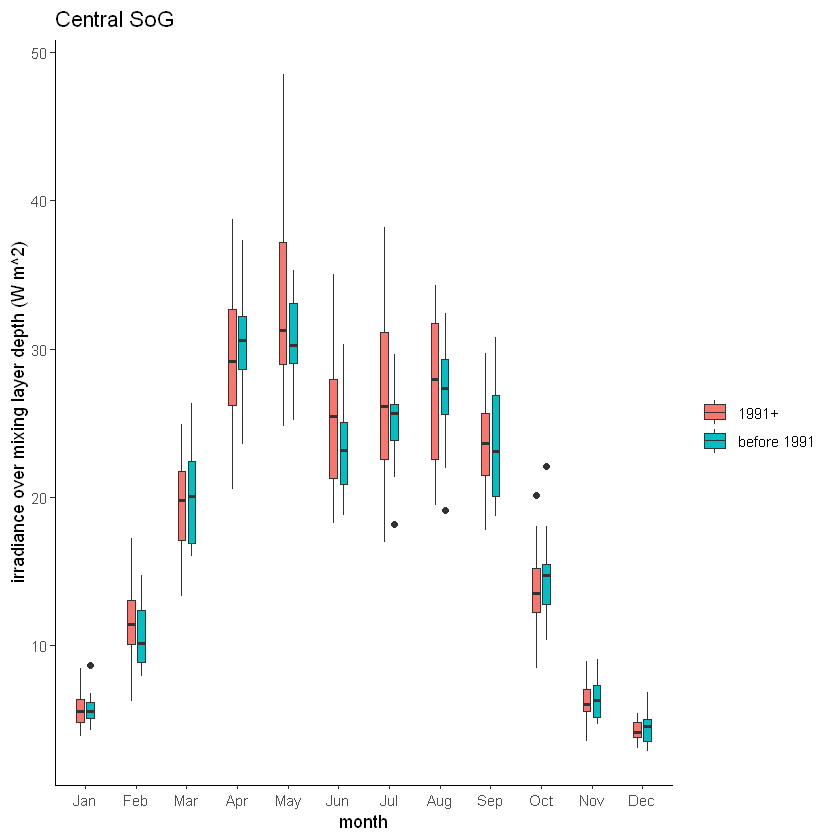

In [281]:
df4_CSoG$regimeyr <- "1991+"               # Assign categories based on numeric range
df4_CSoG$regimeyr[df4_CSoG$yearval <= 1990] <- "before 1991"

# Basic violin plot
p <- df4_CSoG %>% ggplot(aes(x=mo_name, y=meanval, fill=regimeyr)) + 
  #geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="Central SoG",x="month", y = "irradiance over mixing layer depth (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p


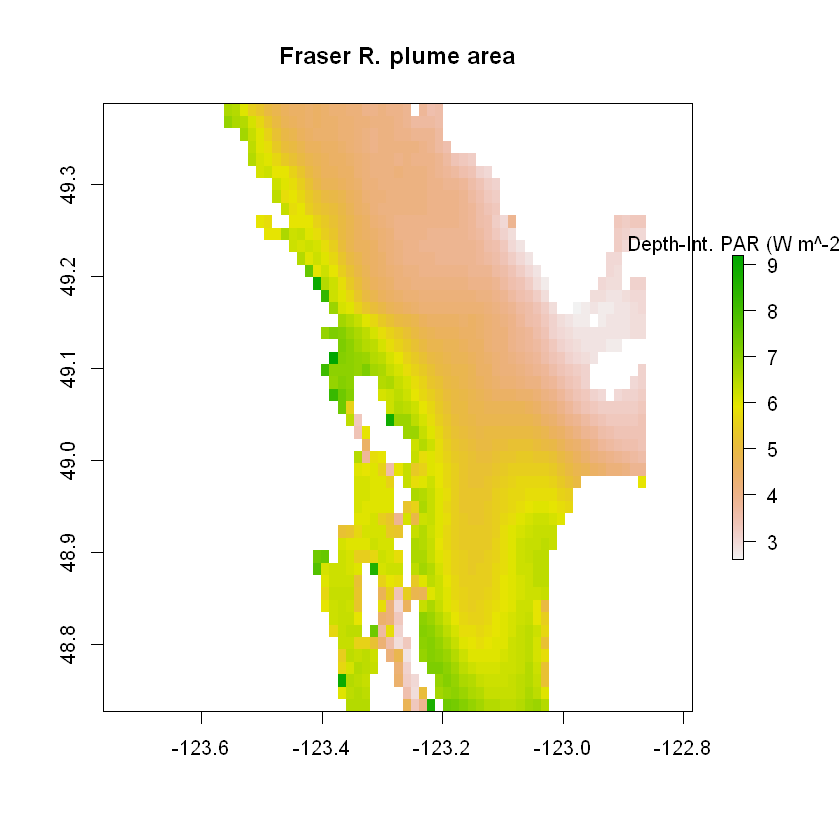

In [310]:
extent_frasr <- extent(r,71,119,10,70)
r_frasr <- crop(r, extent_frasr)
plot(r_frasr, main = "Fraser R. plume area", legend.args = list(text = 'Depth-Int. PAR (W m^-2)'))

In [299]:
# code as above with regionalization

# loop through all ASC files to calculate mean light by month, by year

yrs = 1979:2018
months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (h in 1:length(yrs)) {

yr = yrs[[h]]
print(yr)
 
for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path1,"*",yr,"_", mo,".asc",sep="")) # get all ASC for yr month
outlist2 <- list() #create empty list to store mean vals for this month, across all years

if (length(filenames>0)){
    

for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    r_frasrG <- crop(r, extent_frasr)
    val <- getValues(r_frasrG) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
e1 = (h-1)*12+i
outlist1[[e1]] <- c(yr,mo,mo_name,m2) #store yr, month, mean
}
}
}
    
df4_frasr <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df4_frasr) <- c("year","month","mo_name","mean")
df4_frasr$ts = as.numeric(paste(as.character(df4_frasr$year), as.character(df4_frasr$month), sep=""))
df4_frasr$mo_name <- factor(df4_frasr$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"))
df4_frasr$meanval = as.numeric(as.character(df4_frasr$mean))
df4_frasr$yearval <- as.numeric(as.character(df4_frasr$year))

return("complete")

[1] 1979
[1] 1980
[1] 1981
[1] 1982
[1] 1983
[1] 1984
[1] 1985
[1] 1986
[1] 1987
[1] 1988
[1] 1989
[1] 1990
[1] 1991
[1] 1992
[1] 1993
[1] 1994
[1] 1995
[1] 1996
[1] 1997
[1] 1998
[1] 1999
[1] 2000
[1] 2001
[1] 2002
[1] 2003
[1] 2004
[1] 2005
[1] 2006
[1] 2007
[1] 2008
[1] 2009
[1] 2010
[1] 2011
[1] 2012
[1] 2013
[1] 2014
[1] 2015
[1] 2016
[1] 2017
[1] 2018


ERROR: Error in paste(as.character(df4_frasr$year), as.character(df4_SSdf4_frasroG$month), : object 'df4_SSdf4_frasroG' not found


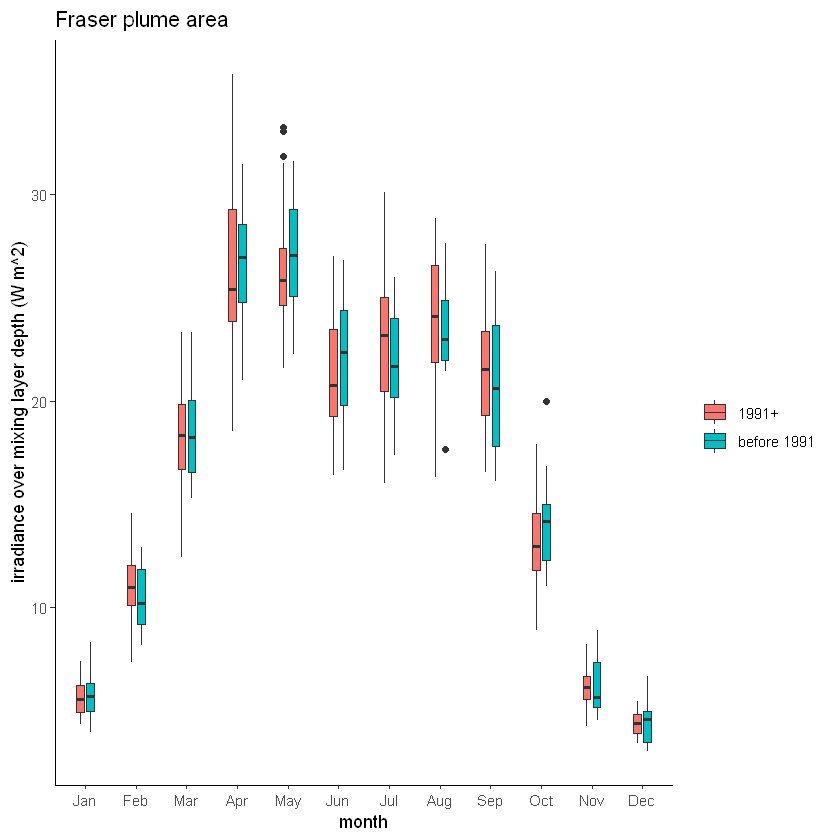

In [311]:
df4_frasr$regimeyr <- "1991+"               # Assign categories based on numeric range
df4_frasr$regimeyr[df4_frasr$yearval <= 1990] <- "before 1991"

# Basic violin plot
p <- df4_frasr %>% ggplot(aes(x=mo_name, y=meanval, fill=regimeyr)) + 
  #geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="Fraser plume area",x="month", y = "irradiance over mixing layer depth (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p




In [298]:
df4_frasr

year,month,mo_name,mean,regimeyr
<fct>,<fct>,<fct>,<fct>,<chr>
1979,02,Feb,9.4323011963406,1991+
1979,03,Mar,22.9186488388459,1991+
1979,04,Apr,31.22554539057,1991+
1979,05,May,30.7016185784659,1991+
1979,06,Jun,26.821463757917,1991+
1979,07,Jul,25.5650950035186,1991+
1979,08,Aug,24.5190007037298,1991+
1979,09,Sep,19.7639690358902,1991+
1979,10,Oct,14.9102744546094,1991+


Warning message in .local(x, ...):
"invalid second colummn"

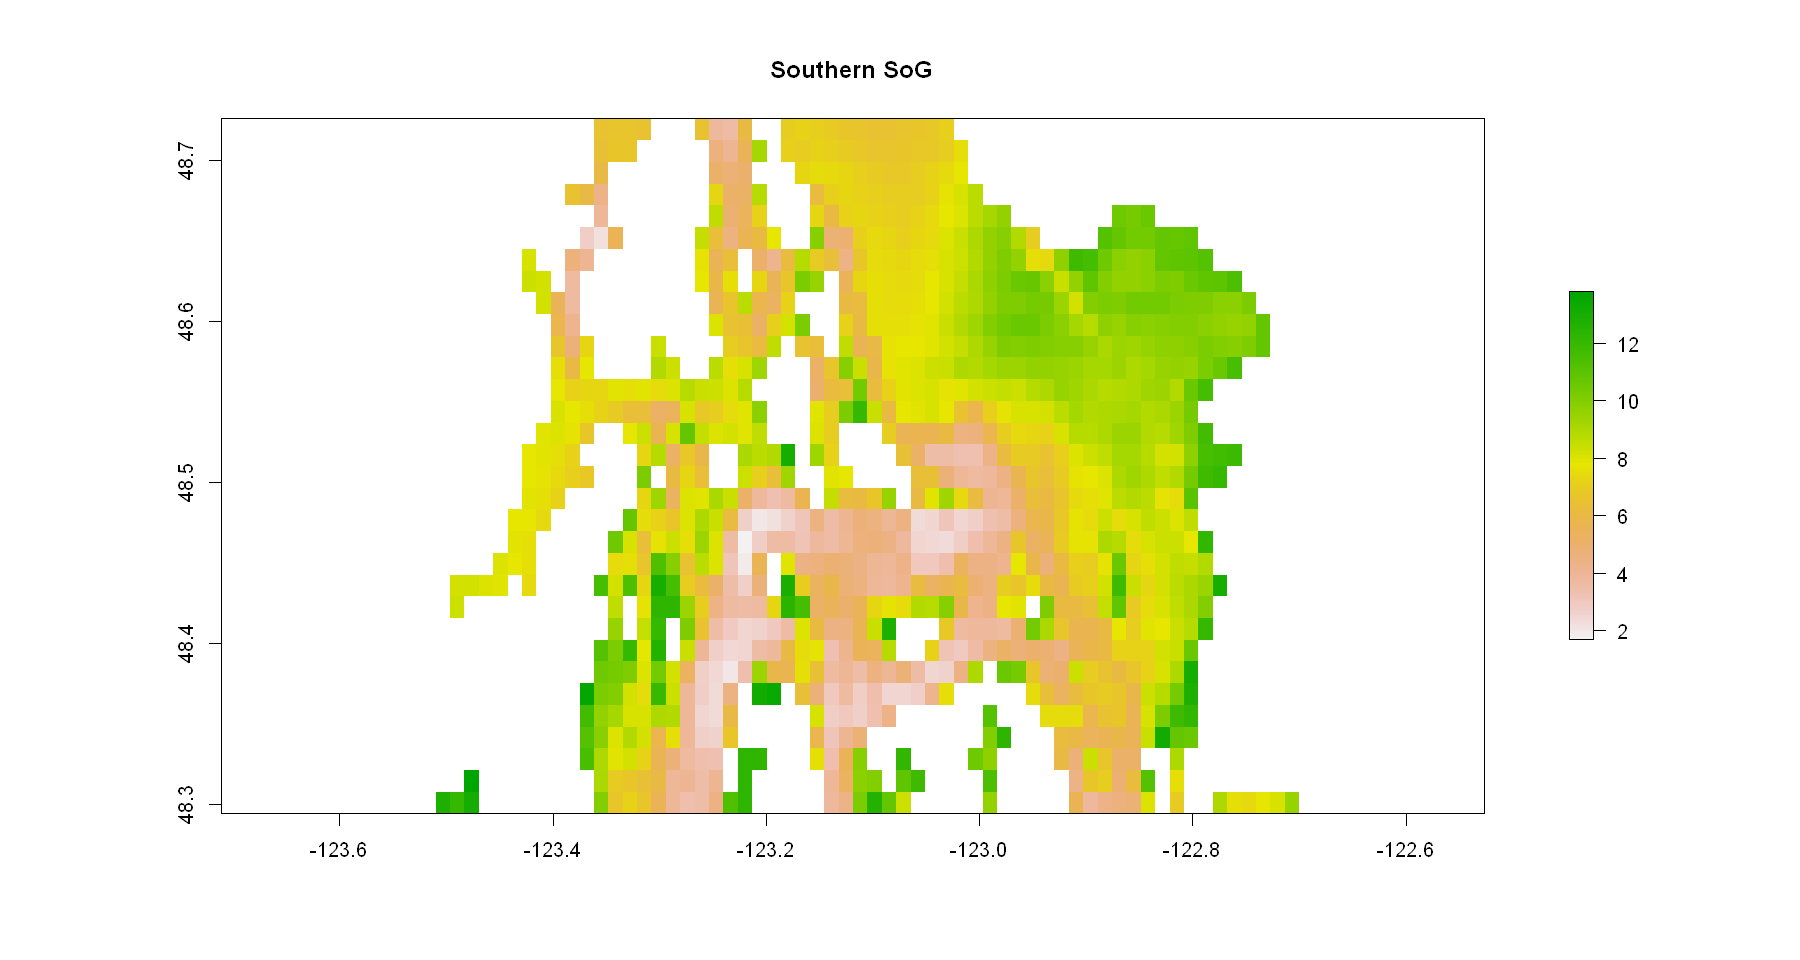

In [318]:
extent_SSoG <- extent(r,120,,10,100)
r_SSoG <- crop(r, extent_SSoG)
plot(r_SSoG, main = "Southern SoG")

In [287]:
# code as above with regionalization

# loop through all ASC files to calculate mean light by month, by year

yrs = 1979:2018
months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (h in 1:length(yrs)) {

yr = yrs[[h]]
print(yr)
 
for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path1,"*",yr,"_", mo,".asc",sep="")) # get all ASC for yr month
outlist2 <- list() #create empty list to store mean vals for this month, across all years

if (length(filenames>0)){
    

for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    r_SSoG <- crop(r, extent_SSoG)
    val <- getValues(r_SSoG) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
e1 = (h-1)*12+i
outlist1[[e1]] <- c(yr,mo,mo_name,m2) #store yr, month, mean
}
}
}
    
df4_SSoG <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df4_SSoG) <- c("year","month","mo_name","mean")
df4_SSoG$ts = as.numeric(paste(as.character(df4_SSoG$year), as.character(df4_SSoG$month), sep=""))
df4_SSoG$mo_name <- factor(df4_SSoG$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"))
df4_SSoG$meanval = as.numeric(as.character(df4_SSoG$mean))
df4_SSoG$yearval <- as.numeric(as.character(df4_SSoG$year))

return("complete")

[1] 1979
[1] 1980
[1] 1981
[1] 1982
[1] 1983
[1] 1984
[1] 1985
[1] 1986
[1] 1987
[1] 1988
[1] 1989
[1] 1990
[1] 1991
[1] 1992
[1] 1993
[1] 1994
[1] 1995
[1] 1996
[1] 1997
[1] 1998
[1] 1999
[1] 2000
[1] 2001
[1] 2002
[1] 2003
[1] 2004
[1] 2005
[1] 2006
[1] 2007
[1] 2008
[1] 2009
[1] 2010
[1] 2011
[1] 2012
[1] 2013
[1] 2014
[1] 2015
[1] 2016
[1] 2017
[1] 2018


[1] "complete"

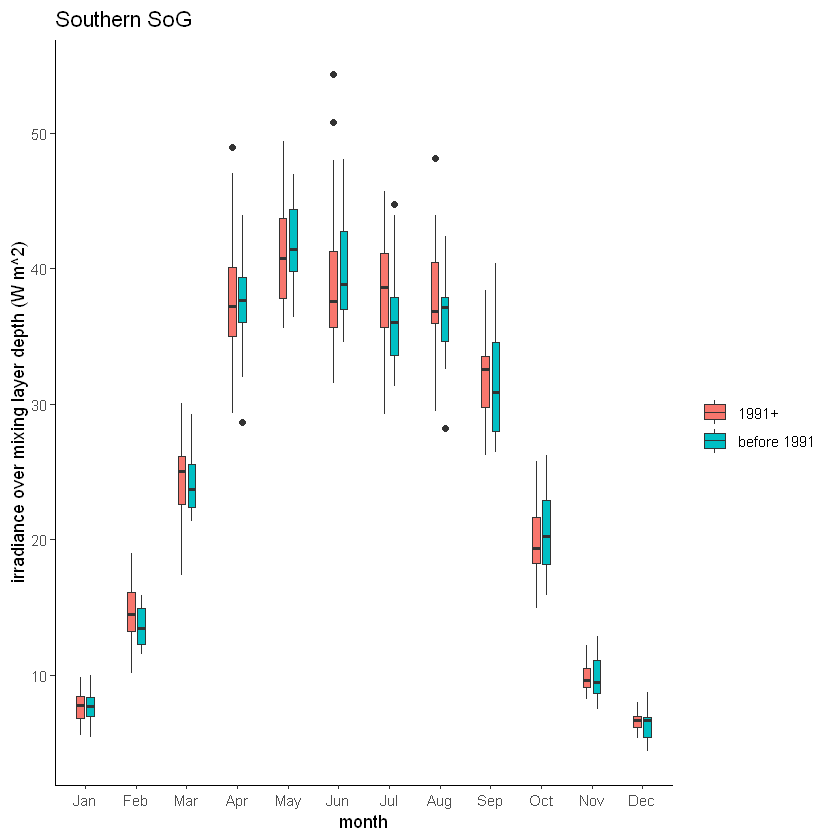

In [289]:
df4_SSoG$regimeyr <- "1991+"               # Assign categories based on numeric range
df4_SSoG$regimeyr[df4_SSoG$yearval <= 1990] <- "before 1991"

# Basic violin plot
p <- df4_SSoG %>% ggplot(aes(x=mo_name, y=meanval, fill=regimeyr)) + 
  #geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="Southern SoG",x="month", y = "irradiance over mixing layer depth (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p


In [315]:
# combine all, to compare between regions
df3_NSoG$region <- "NSoG"
df4_CSoG$region <- "CSoG"
df4_frasr$region <- "Fras. R."
df4_SSoG$region <- "SSoG"

allreg_df <- bind_rows(df3_NSoG, df4_CSoG, df4_frasr, df4_SSoG)

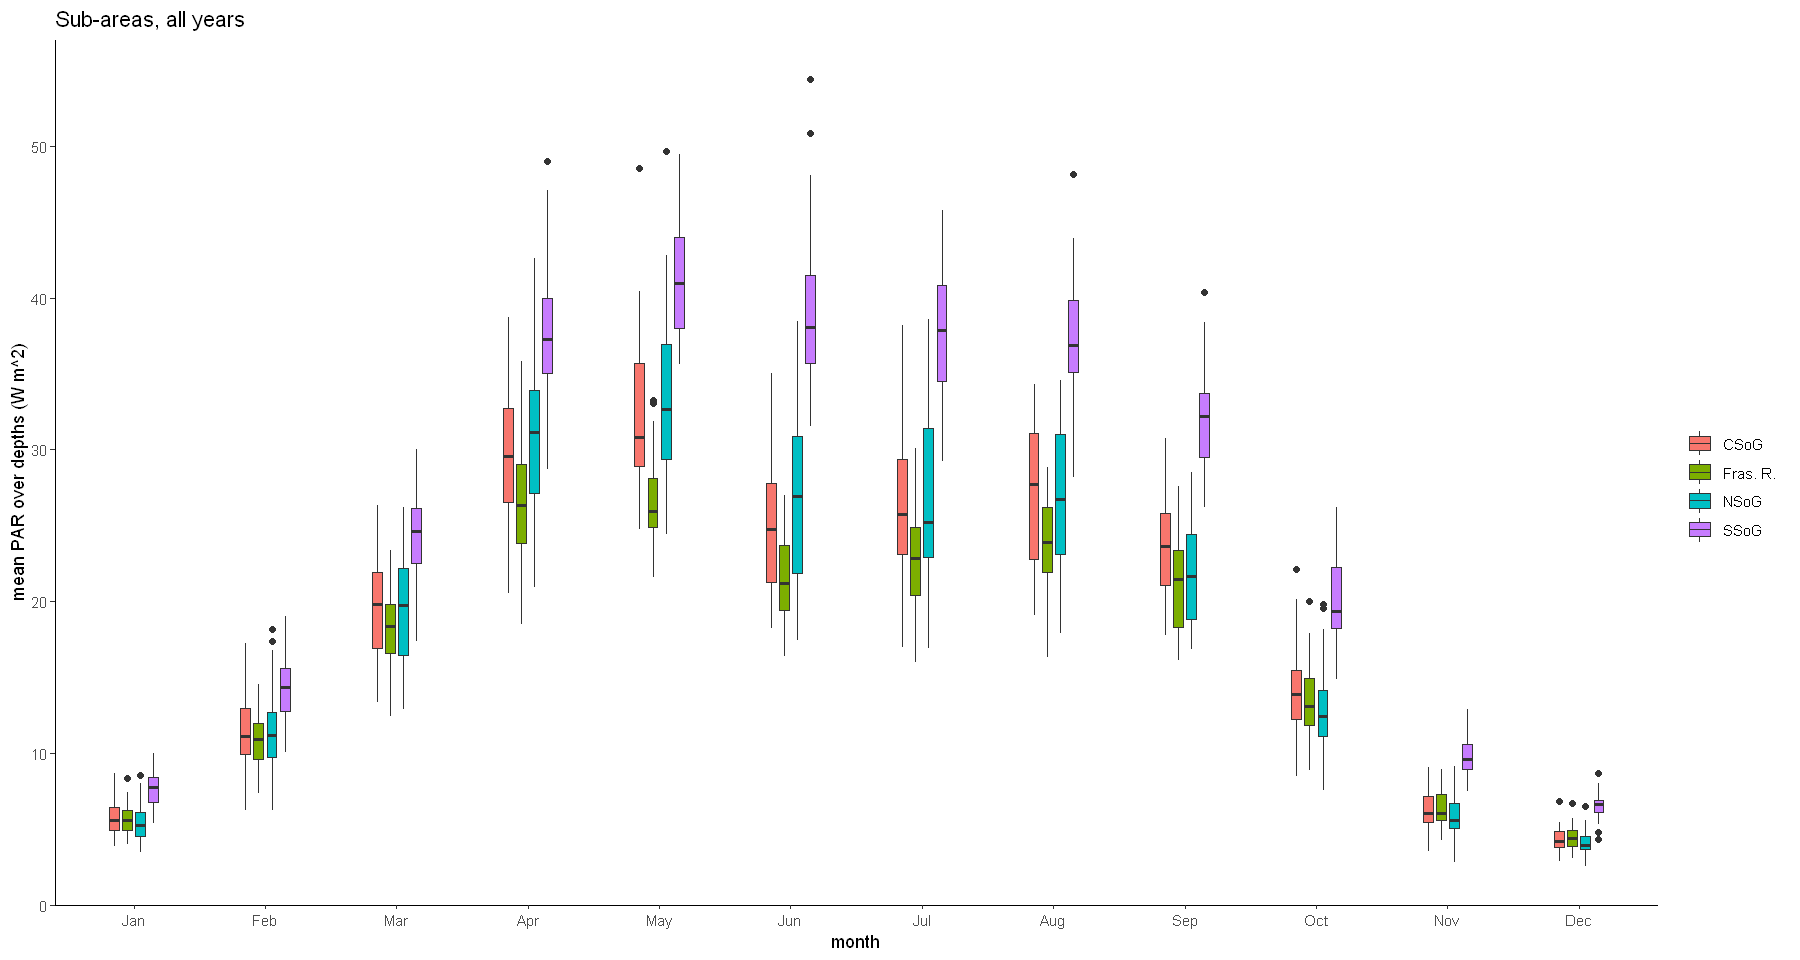

In [317]:
# Basic violin plot
options(repr.plot.width=15, repr.plot.height=8)
p <- allreg_df %>% ggplot(aes(x=mo_name, y=meanval, fill=region)) + 
  #geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="Sub-areas, all years",x="month", y = "mean PAR over depths (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p

Warning message in .local(x, ...):
"invalid second colummn"

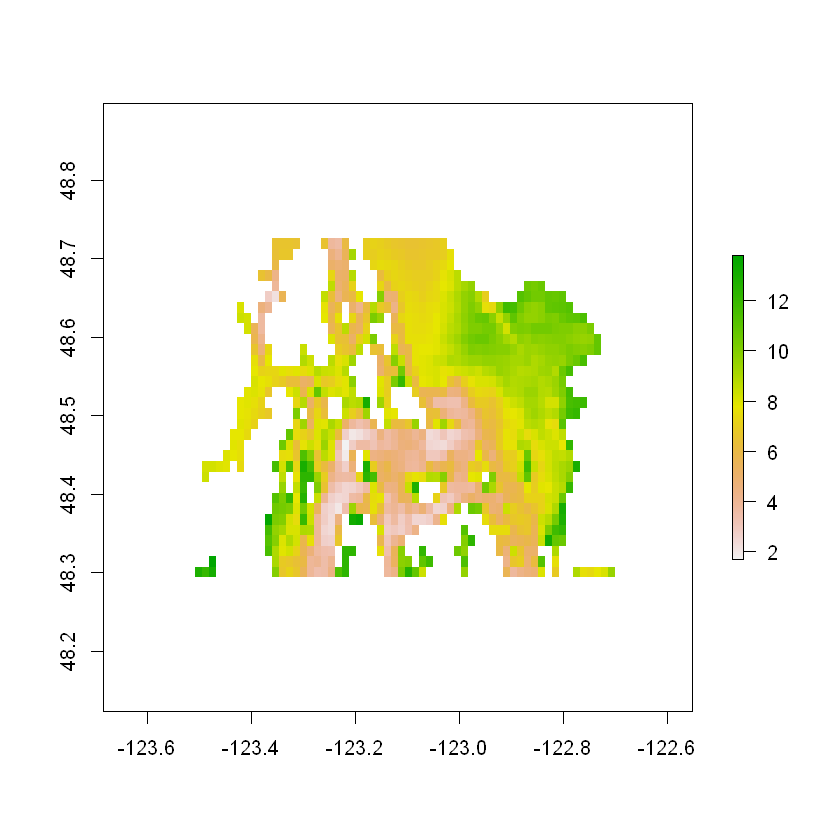

In [290]:
# what is going on? Why less light in Jun Jul
# let's look at K atten coefficient (turbid)

# loop through all ASC files to calculate mean light by month, by year
path2 = "C:\\Users\\Greig\\Sync\\PSF\\EwE\\Georgia Strait 2021\\LTL_model\\DATA\\SalishSea1500-RUN202\\ECOSPACE_in_RUN103a\\RUN103-Kfromsal_singlelev4m\\"

yrs = 1979:2018
months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (h in 1:length(yrs)) {

yr = yrs[[h]]
print(yr)
 
for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path2,"*",yr,"_", mo,".asc",sep="")) # get all ASC for yr month
outlist2 <- list() #create empty list to store mean vals for this month, across all years

if (length(filenames>0)){
    

for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    val <- getValues(r) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
e1 = (h-1)*12+i
outlist1[[e1]] <- c(yr,mo,mo_name,m2) #store yr, month, mean
}
}
}
    
df4_K <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df4_K) <- c("year","month","mo_name","mean")
df4_K$ts = as.numeric(paste(as.character(df4_K$year), as.character(df4_K$month), sep=""))
df4_K$mo_name <- factor(df4_K$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"))
df4_K$meanval = as.numeric(as.character(df4_K$mean))
df4_K$yearval <- as.numeric(as.character(df4_K$year))

return("complete")

In [ ]:
# visualize K
df4_K$regimeyr <- "1991+"               # Assign categories based on numeric range
df4_K$regimeyr[df4_K$yearval <= 1990] <- "before 1991"

# Basic violin plot
p <- df4_K %>% ggplot(aes(x=mo_name, y=meanval, fill=regimeyr)) + 
  geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="K",x="month", y = "irradiance over mixing layer depth (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p


In [322]:
# visualize Turbo Z


# loop through all ASC files to calculate mean light by month, by year
path3 = "C:\\Users\\Greig\\Sync\\PSF\\EwE\\Georgia Strait 2021\\LTL_model\\DATA\\SalishSea1500-RUN202\\NEMO_out_ASC\\MixingTurboZ\\"

yrs = 1979:2018
months = list("01","02","03","04","05","06","07","08","09","10","11","12")
months_names = list("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
outlist1 <- list() #create empty list to store outputs from loop

for (h in 1:length(yrs)) {

yr = yrs[[h]]
print(yr)
 
for (i in 1:length(months)) {

mo = months[[i]]
mo_name = months_names[[i]]
filenames =  Sys.glob(paste(path3,"*",yr,"_", mo,".asc",sep="")) # get all ASC for yr month
outlist2 <- list() #create empty list to store mean vals for this month, across all years

if (length(filenames>0)){
    

for (j in 1:length(filenames)) { #for each raster in rasterlist
    r = raster(paste(filenames[[j]],sep=""))
    r[r == -9999] <- NA
    r[r == 0] <- NA
    val <- getValues(r) #get raster values
    m <- mean(val,na.rm=T) #remove NAs and compute mean
    outlist2[[j]] <- c(m) #store raster path with month, mean
   
}
m2 <- mean(unlist(outlist2), na.rm=T)
e1 = (h-1)*12+i
outlist1[[e1]] <- c(yr,mo,mo_name,m2) #store yr, month, mean
}
}
}
    
df4_tZ <- data.frame(do.call(rbind,outlist1)) #convert list to data frame
colnames(df4_tZ) <- c("year","month","mo_name","mean")
df4_tZ$ts = as.numeric(paste(as.character(df4_tZ$year), as.character(df4_tZ$month), sep=""))
df4_tZ$mo_name <- factor(df4_tZ$mo_name,levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"))
df4_tZ$meanval = as.numeric(as.character(df4_tZ$mean))
df4_tZ$yearval <- as.numeric(as.character(df4_tZ$year))

return("complete")

[1] 1979
[1] 1980
[1] 1981
[1] 1982
[1] 1983
[1] 1984
[1] 1985
[1] 1986
[1] 1987
[1] 1988
[1] 1989
[1] 1990
[1] 1991
[1] 1992
[1] 1993
[1] 1994
[1] 1995
[1] 1996
[1] 1997
[1] 1998
[1] 1999
[1] 2000
[1] 2001
[1] 2002
[1] 2003
[1] 2004
[1] 2005
[1] 2006
[1] 2007
[1] 2008
[1] 2009
[1] 2010
[1] 2011
[1] 2012
[1] 2013
[1] 2014
[1] 2015
[1] 2016
[1] 2017
[1] 2018


[1] "complete"

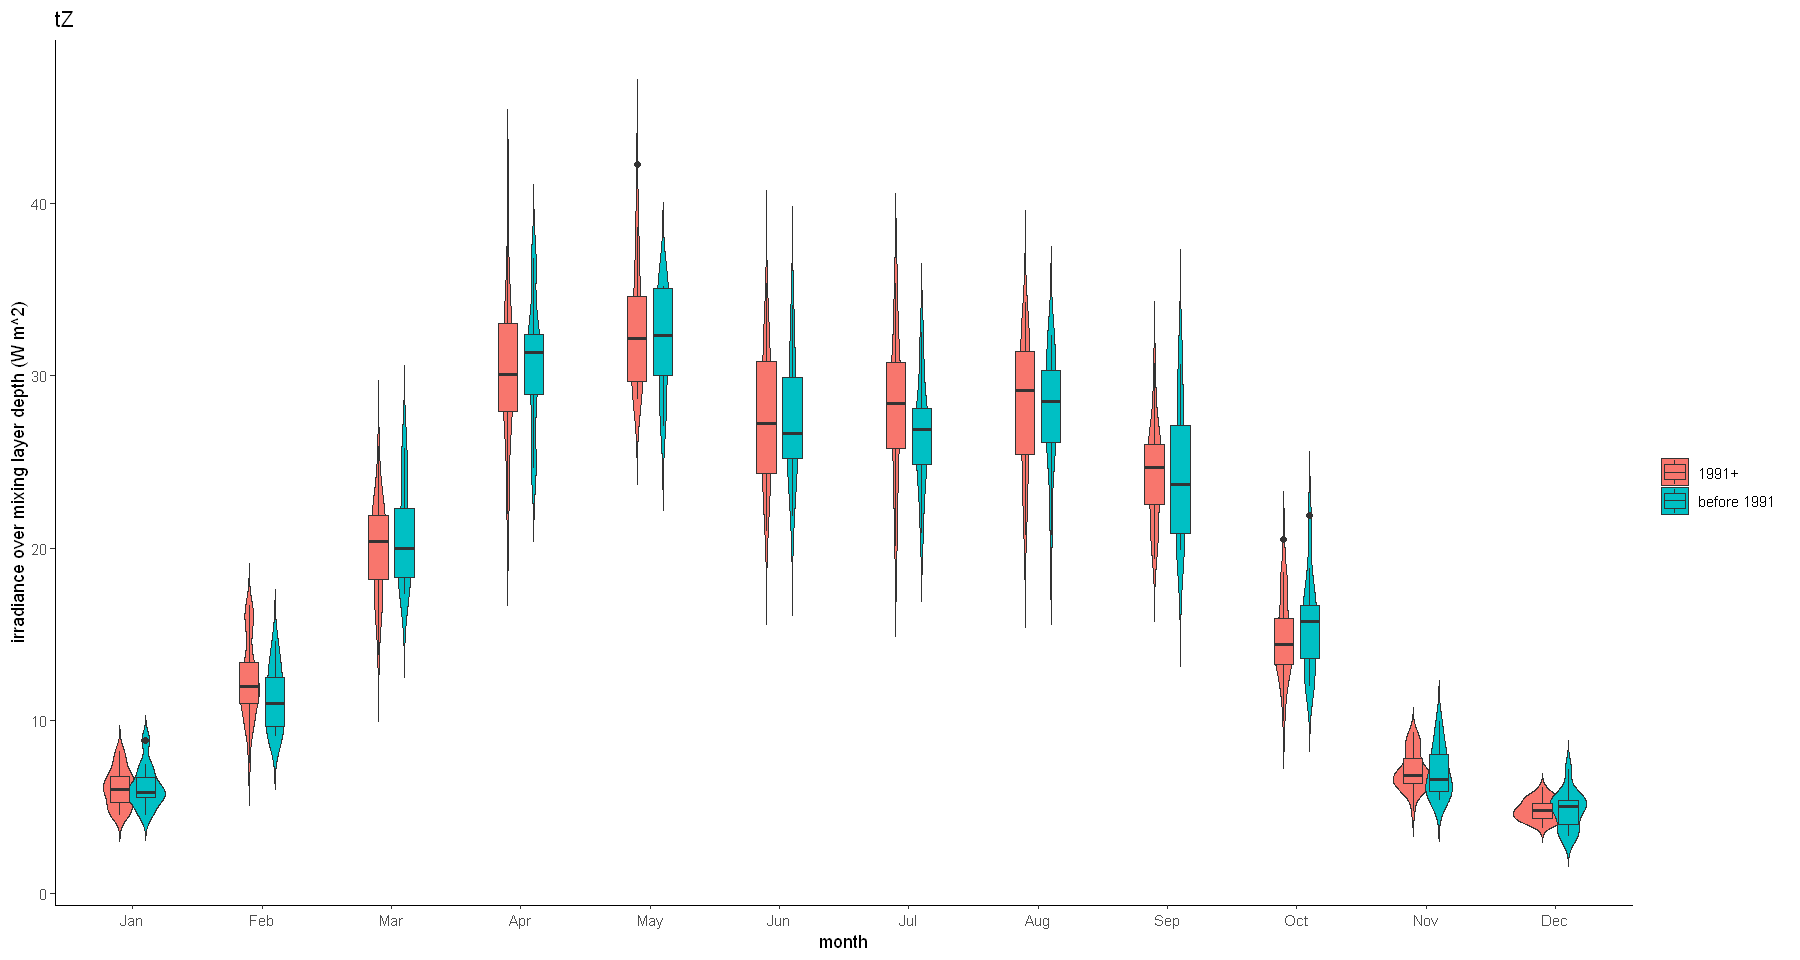

In [321]:
# visualize t Z
df4_tZ$regimeyr <- "1991+"               # Assign categories based on numeric range
df4_tZ$regimeyr[df4_tZ$yearval <= 1990] <- "before 1991"

# Basic violin plot
p <- df4_tZ %>% ggplot(aes(x=mo_name, y=meanval, fill=regimeyr)) + 
  geom_violin(trim=FALSE,position=position_dodge(0.4))+
  labs(title="tZ",x="month", y = "irradiance over mixing layer depth (W m^2)")+
  geom_boxplot(width=0.3, position=position_dodge(0.4))+
  labs(fill='') + 
  theme_classic()
p
